# Hard-thresholding filtering

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from src.utilities.utilstf import *
from mcsm_benchmarks.SignalBank import SignalBank
from mcsm_benchmarks.Benchmark import Benchmark
from src.methods.method_hard_threshold import hard_thresholding

In [2]:
np.random.seed(0) 
# signal parameters
SNRin = 10
N = 2**10
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_multi_linear()
noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)

In [3]:
Nfft = N
g,_ = get_round_window(Nfft)
S, stft = get_spectrogram(signal, window = g)
output_dict = hard_thresholding(signal, coeff=3.0, dict_output=True)
signals_output, mask, stft = (i for i in output_dict.values())
print(10*np.log10((np.sum(s**2))/(np.sum((s-signals_output)**2))))

15.632311587341457


(1025, 1024)


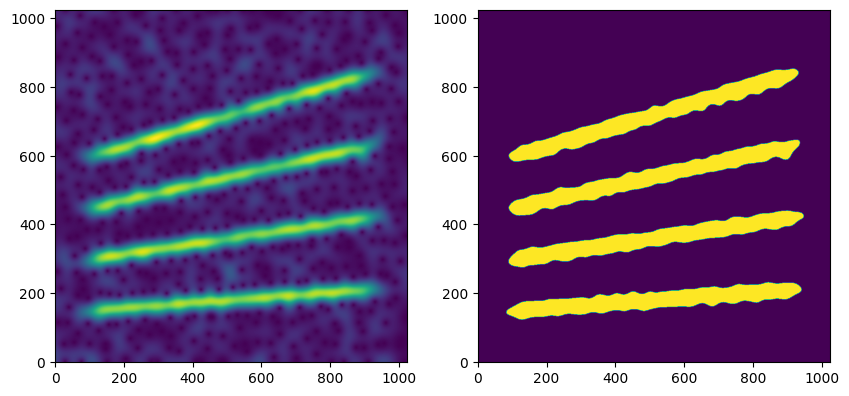

In [4]:
print(S.shape)
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(abs(stft[0:N+1,:]), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
# ax[1].plot(signals_output)
# ax[1].plot(s,'r--')
plt.show()
